### [Микроперепись населения - 2015](https://gks.ru/free_doc/new_site/population/demo/micro-perepis/finish/micro-perepis.html)  
#### 1.2. [Население, принявшее участие в микропереписи, по полу, возрастным группам и состоянию в браке (супружеском союзе)](https://gks.ru/free_doc/new_site/population/demo/micro-perepis/finish/01/01-02_(%D0%B0%D0%B1%D1%81).xlsx)
Данные предварительно упрощены для машинного анализа (удалены агрегированные показатели по округам, областям и т.д.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
census = pd.read_excel("PopulationСensus2015.xlsx")
census["Divorced"] = census["OfficiallyDivorced"]+ census["NonOfficialylDivorced"]
census.head()


,FederalDistrict,Region,CityOrRural,Gender,AgeGroup,TotalRespondents,AnsweredAboutMarriage,DeclinedAbotMarriage,InMarriage,InOfficialMarriage,InNonOfficialMarriage,NeverMarried,OfficiallyDivorced,NonOfficialylDivorced,Widow,Divorced
0,Центральный,Белгородская область,Городское население,Мужчины,16 – 17,144,143,1.0,3.0,3.0,NaN,140.0,NaN,NaN,NaN,NaN
1,Центральный,Белгородская область,Городское население,Мужчины,18 – 19,135,135,NaN,5.0,3.0,2.0,129.0,NaN,1.0,NaN,NaN
2,Центральный,Белгородская область,Городское население,Мужчины,20 – 24,531,531,NaN,115.0,72.0,43.0,411.0,4.0,1.0,NaN,5.0
3,Центральный,Белгородская область,Городское население,Мужчины,25 – 29,725,725,NaN,435.0,367.0,68.0,255.0,23.0,12.0,NaN,35.0
4,Центральный,Белгородская область,Городское население,Мужчины,30 – 34,684,684,NaN,501.0,451.0,50.0,103.0,60.0,18.0,2.0,78.0


In [3]:
by_district_age = census.pivot_table(columns="Gender", index=["AgeGroup"], values="TotalRespondents", aggfunc="sum", fill_value = 0).applymap(int)
by_district_age["FtM_Ratio"] = (by_district_age["Женщины"] / by_district_age["Мужчины"])-1
by_district_age.reset_index(inplace=True)
by_district_age

Gender,AgeGroup,Женщины,Мужчины,FtM_Ratio
0,до 16,32,32,0.000000
1,16 – 17,20394,21280,-0.041635
2,18 – 19,19650,18625,0.055034
3,20 – 24,62335,59827,0.041921
4,25 – 29,91815,89738,0.023145
5,30 – 34,90924,87215,0.042527
6,35 – 39,87902,78813,0.115324
7,40 – 44,83339,72834,0.144232
8,45 – 49,76857,67158,0.144421
9,50 – 59,198543,154459,0.285409


[Text(0, 0.5, 'Возрастная группа'), Text(0.5, 0, 'Соотношенеи ( ж / м ) - 1')]

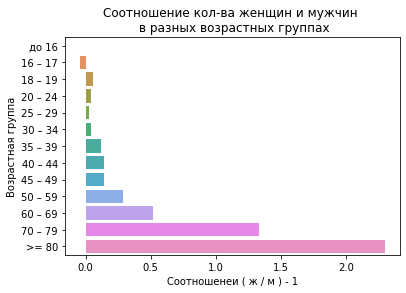

In [4]:
g = sns.barplot(y="AgeGroup",x="FtM_Ratio",  data=by_district_age)
g.set_title("Соотношение кол-ва женщин и мужчин \n в разных возрастных группах")
g.set(xlabel='Соотношенеи ( ж / м ) - 1', ylabel="Возрастная группа")

In [5]:
by_gender_age = census.pivot_table(columns=["Gender"], index = ["AgeGroup"], values="TotalRespondents", aggfunc="sum")
by_gender_age

Gender,Женщины,Мужчины
AgeGroup,,
до 16,32,32
16 – 17,20394,21280
18 – 19,19650,18625
20 – 24,62335,59827
25 – 29,91815,89738
30 – 34,90924,87215
35 – 39,87902,78813
40 – 44,83339,72834
45 – 49,76857,67158


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002342CDDD8D0>,
      dtype=object)

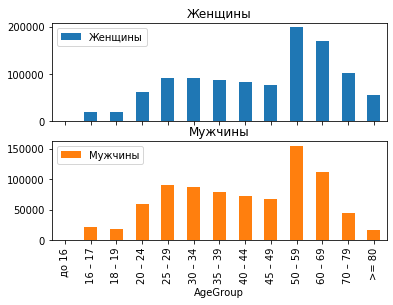

In [6]:
by_gender_age.plot(kind="bar",subplots =True)

In [7]:
by_location = census.pivot_table(columns=["CityOrRural"], index = ["AgeGroup"], values="TotalRespondents", aggfunc="sum")
by_location

CityOrRural,Городское население,Сельское население
AgeGroup,,
до 16,52,12
16 – 17,26770,14904
18 – 19,25899,12376
20 – 24,84684,37478
25 – 29,129545,52008
30 – 34,127373,50766
35 – 39,117711,49004
40 – 44,107623,48550
45 – 49,95142,48873


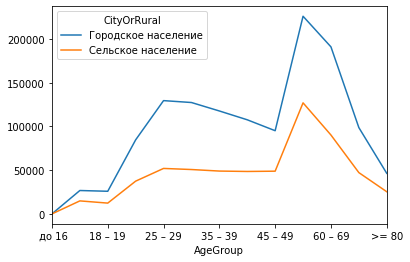

In [8]:
by_location.plot(kind="line")

In [9]:
heat_map = census.groupby("AgeGroup").sum().loc[:,["NeverMarried","InMarriage","Divorced","Widow"]]
heat_map.head()

,NeverMarried,InMarriage,Divorced,Widow
AgeGroup,,,,
до 16,0.0,61.0,0.0,0.0
16 – 17,40548.0,740.0,2.0,10.0
18 – 19,34644.0,3389.0,23.0,17.0
20 – 24,78673.0,40280.0,2641.0,130.0
25 – 29,58113.0,110036.0,12462.0,548.0


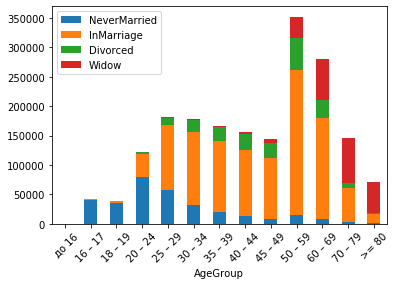

In [10]:
heat_map.plot(kind='bar', rot=45, stacked=True, orientation="vertical")

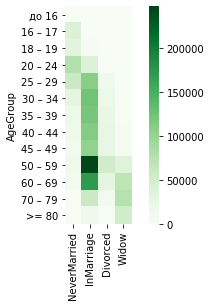

In [11]:
ax = sns.heatmap(heat_map, cmap="Greens", square=True)